Here are some indicative types of analysis you can perform. Please note that this is not an exhaustive list, you may add more. 	Come up with appropriate results  for the followin- \
o	Is there any relation between contract duration, charges and the customer chur \n
o	Is the dataset balanc \e
o	Identify the relationship between the services offered and the churn r \a.
o	Demographic analysis of the customers.


In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import os
import re
import gc
import copy
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [740]:
from IPython.display import display_html, display
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Data Loading

In [743]:
data_dir_path = os.path.abspath('TelecomData')
data_dir_path

'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\TelecomData'

In [745]:
datafile_names = os.listdir(data_dir_path)
datafile_paths = [os.path.join(data_dir_path, datafile) for datafile in datafile_names]

datafile_paths

['C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\TelecomData\\Customer_account_info.xlsx',
 'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\TelecomData\\Customer_Churn.csv',
 'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\TelecomData\\Customer_demographics.xlsx',
 'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\TelecomData\\Customer_services.xlsx']

In [747]:
cust_acc_df = pd.read_excel(datafile_paths[0])
cust_churn_df = pd.read_csv(datafile_paths[1])
cust_demo_df = pd.read_excel(datafile_paths[2])
cust_serv_df = pd.read_excel(datafile_paths[3])

In [751]:
cust_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        34413 non-null  object 
 1   tenure            34397 non-null  float64
 2   Contract          34406 non-null  object 
 3   PaperlessBilling  34380 non-null  object 
 4   PaymentMethod     34364 non-null  object 
 5   MonthlyCharges    34400 non-null  float64
 6   TotalCharges      34403 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [753]:
cust_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  34413 non-null  object
 1   Churn       34413 non-null  object
dtypes: object(2)
memory usage: 537.8+ KB


In [755]:
cust_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerID     34413 non-null  object 
 1   gender         34408 non-null  object 
 2   SeniorCitizen  34371 non-null  float64
 3   Partner        34413 non-null  object 
 4   Dependents     34413 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [757]:
cust_serv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        34413 non-null  object
 1   PhoneService      34401 non-null  object
 2   MultipleLines     34413 non-null  object
 3   InternetService   34413 non-null  object
 4   OnlineSecurity    34376 non-null  object
 5   OnlineBackup      34413 non-null  object
 6   DeviceProtection  34413 non-null  object
 7   TechSupport       34378 non-null  object
 8   StreamingTV       34413 non-null  object
 9   StreamingMovies   34413 non-null  object
dtypes: object(10)
memory usage: 2.6+ MB


## Data cleaning

**Extracting integers from customerID values and replacing them**

In [761]:
reg_exp_cid = r'\d+'
extracted_cids = cust_churn_df['customerID'].apply(lambda x: int(re.search(reg_exp_cid, x).group())).tolist()

cust_churn_df['customerID'] = extracted_cids
cust_acc_df['customerID'] = extracted_cids
cust_demo_df['customerID'] = extracted_cids
cust_serv_df['customerID'] = extracted_cids

In [763]:
cust_acc_df = cust_acc_df.rename(columns={'tenure':'Tenure'})
cust_demo_df = cust_demo_df.rename(columns={'gender': 'Gender'})

### Exploring and Cleaning accounts dataframe

In [766]:
cust_acc_df['Contract'].value_counts(dropna=False)

Contract
Month-to-month    19693
Two year           9823
One year           4890
NaN                   7
Name: count, dtype: int64

In [768]:
cust_acc_df['PaperlessBilling'].value_counts(dropna=False)

PaperlessBilling
Yes    21982
No     12398
NaN       33
Name: count, dtype: int64

In [770]:
cust_acc_df['PaymentMethod'].value_counts(dropna=False)

PaymentMethod
Mailed check                 10643
Electronic check              9566
Bank transfer (automatic)     8656
Credit card (automatic)       5499
NaN                             49
Name: count, dtype: int64

In [772]:
cust_acc_df.loc[~cust_acc_df['TotalCharges'].apply(lambda x: x.isdigit() if isinstance(x, str) else True), 'TotalCharges']

2020      
4431      
4518      
14108     
14358     
15320     
15539     
23409     
23684     
24350     
28679     
30310     
Name: TotalCharges, dtype: object

TotalCharges column is of type object and have a few rows where the value is empty string. We can replace these with null values

In [775]:
cust_acc_df.loc[~cust_acc_df['TotalCharges'].apply(lambda x: x.isdigit() if isinstance(x, str) else True), 'TotalCharges'] = np.nan
cust_acc_df['TotalCharges'] = cust_acc_df['TotalCharges'].astype('float')

In [777]:
cust_acc_df.describe()

,customerID,Tenure,MonthlyCharges,TotalCharges
count,34413.000000,34397.000000,34400.000000,34391.000000
mean,17207.000000,32.912812,65.049760,2493.521648
std,9934.321743,21.396691,27.496134,2417.484468
min,1.000000,0.000000,18.250000,18.800000
25%,8604.000000,16.000000,44.289520,428.700000
50%,17207.000000,32.000000,64.883350,1533.800000
75%,25810.000000,49.000000,84.930166,4284.650000
max,34413.000000,72.000000,118.750000,8684.800000


Accounts table values look clean, except the null values

### Exploring and cleaning demographics dataframe

In [781]:
cust_demo_df.columns.tolist()

['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [783]:
cust_demo_df['Gender'].value_counts(dropna=False)

Gender
Male      17490
Female    16918
NaN           5
Name: count, dtype: int64

In [785]:
cust_demo_df['SeniorCitizen'].value_counts(dropna=False)

SeniorCitizen
0.0    28210
1.0     6161
NaN       42
Name: count, dtype: int64

In [787]:
cust_demo_df['Partner'].value_counts(dropna=False)

Partner
No     17901
Yes    16512
Name: count, dtype: int64

In [789]:
cust_demo_df['Dependents'].value_counts(dropna=False)

Dependents
No     26995
Yes     7418
Name: count, dtype: int64

### Exploring and cleaning servies table

In [792]:
cust_serv_df.columns.tolist()

['customerID',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [794]:
for col in cust_serv_df.columns:
    if col == 'customerID':
        continue
    print(cust_serv_df[col].value_counts(dropna=False))
    print("++++++++++++++++++++++++++++++++")

PhoneService
Yes    33520
No       881
NaN       12
Name: count, dtype: int64
++++++++++++++++++++++++++++++++
MultipleLines
No                  16150
Yes                 15931
No phone service     2332
Name: count, dtype: int64
++++++++++++++++++++++++++++++++
InternetService
DSL            15006
Fiber optic    14181
No              5226
Name: count, dtype: int64
++++++++++++++++++++++++++++++++
OnlineSecurity
No                     16890
Yes                    12216
No internet service     5270
NaN                       37
Name: count, dtype: int64
++++++++++++++++++++++++++++++++
OnlineBackup
Yes                    15080
No                     14064
No internet service     5269
Name: count, dtype: int64
++++++++++++++++++++++++++++++++
DeviceProtection
Yes                    15037
No                     14047
No internet service     5329
Name: count, dtype: int64
++++++++++++++++++++++++++++++++
TechSupport
No                     16860
Yes                    12341
No internet servic

## Merging all the dataframes together for EDA

In [797]:
temp_df = pd.merge(cust_acc_df, cust_churn_df, on='customerID')
temp_df = pd.merge(temp_df, cust_demo_df, on='customerID')
combined_df = pd.merge(temp_df, cust_serv_df, on='customerID')

del temp_df
_ = gc.collect()

In [798]:
combined_df.head()

,customerID,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55,Yes,Male,0.0,Yes,No,Yes,No phone service,Fiber optic,No,No,No,No,No,No
1,2,32.0,Month-to-month,Yes,Electronic check,76.845120,669.45,No,Female,0.0,Yes,Yes,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes
2,3,0.0,Month-to-month,No,Electronic check,55.614150,3791.60,No,Female,0.0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Yes
3,4,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.10,No,Female,1.0,No,No,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes
4,5,38.0,Month-to-month,Yes,Bank transfer (automatic),NaN,1496.90,No,Male,1.0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


## EDA

In [800]:
np.round(cust_churn_df['Churn'].value_counts(normalize=True, dropna=False), 2)

Churn
No     0.83
Yes    0.17
Name: proportion, dtype: float64

**17%** of customers have stopped using the services, So it's an **imbalanced dataset**.

#### Tenure

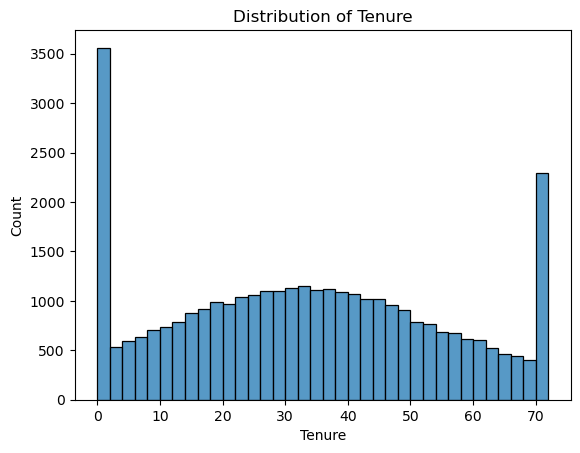

In [806]:
tenure_plot = sns.histplot(data=combined_df, x='Tenure')
tenure_plot.set_title('Distribution of Tenure')
plt.show()

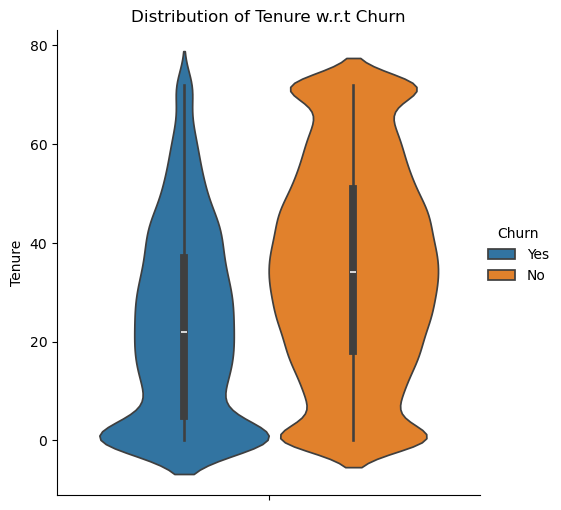

In [808]:
tenure_churn_plot = sns.catplot(kind='violin', data=combined_df, hue='Churn', y='Tenure')
tenure_churn_plot.ax.set_title('Distribution of Tenure w.r.t Churn')
plt.show()

In [809]:
avg_tenure_wrt_churn = combined_df.groupby('Churn')['Tenure'].apply(lambda x: round(x.mean(), 3))
avg_tenure_wrt_churn.name = 'Average Tenure of customer w.r.t churn'
avg_tenure_wrt_churn

Churn
No     34.831
Yes    23.434
Name: Average Tenure of customer w.r.t churn, dtype: float64

- Tenure has two pretty evident peaks at both extremes of 0 and 72.
- Apart from these peaks the rest of the population follows a normal like distribution.
- The tenure for customers who have churned is lower (**23.4 months**) as compared to those who stayed (**34.8 months**).

- **So, customers with greater Tenure are less likely to discontinue using the services of the telecom company.**

#### Monthly Charges

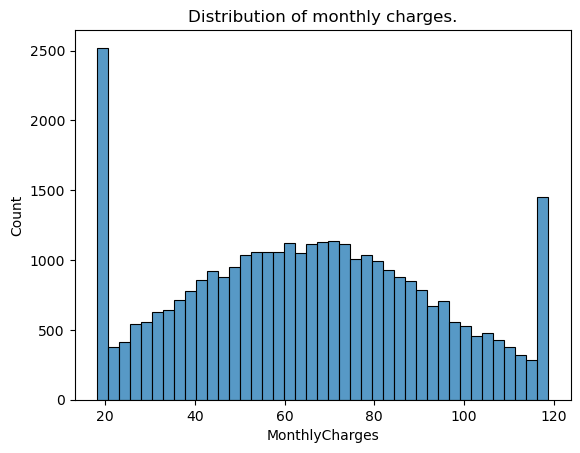

In [814]:
mon_charge_plot = sns.histplot(data=combined_df, x='MonthlyCharges')
mon_charge_plot.set_title('Distribution of monthly charges.')
plt.show()

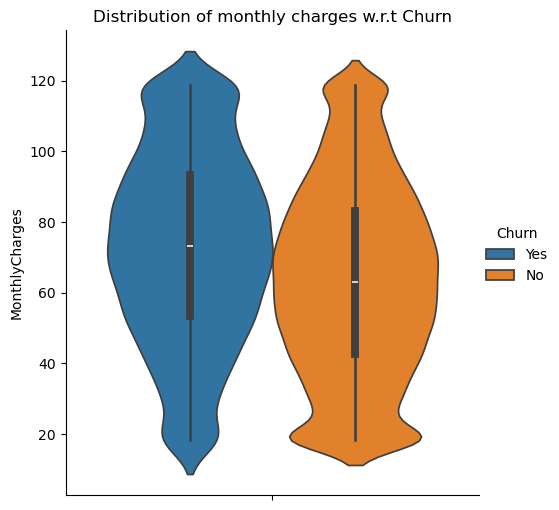

In [816]:
mon_charge_churn_plot = sns.catplot(kind='violin', data=combined_df, hue='Churn', y='MonthlyCharges')
mon_charge_churn_plot.ax.set_title('Distribution of monthly charges w.r.t Churn')
plt.show()

In [818]:
avg_mon_charge_wrt_churn = combined_df.groupby('Churn')['MonthlyCharges'].agg([np.mean, lambda x: sp.stats.skew(x, nan_policy='omit')])
avg_mon_charge_wrt_churn.name = "Averge monthly charges w.r.t churn"
avg_mon_charge_wrt_churn.columns = ['mean', 'skew']
avg_mon_charge_wrt_churn

,mean,skew
Churn,,
No,63.500843,0.131798
Yes,72.709750,-0.126569


- Peaks at extreme values, with max value being less than 120 and min being around 18.
- Average monthly charge of customers who've churned is higher (**72.7**) than those who didn't (**63.5**).
- Distribution of Monthly charges is skewed towards right for customers who didn't churn and left skewed for those who churned.
- **So, greater monthly charges lead to customers to be more likely to be churned.**

#### Total Charges

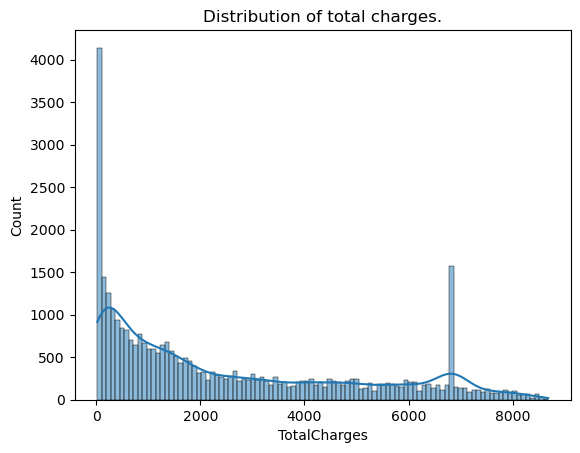

In [822]:
tot_charge_plot = sns.histplot(data=combined_df, x='TotalCharges', kde=True, bins=100)
tot_charge_plot.set_title('Distribution of total charges.')
plt.show()

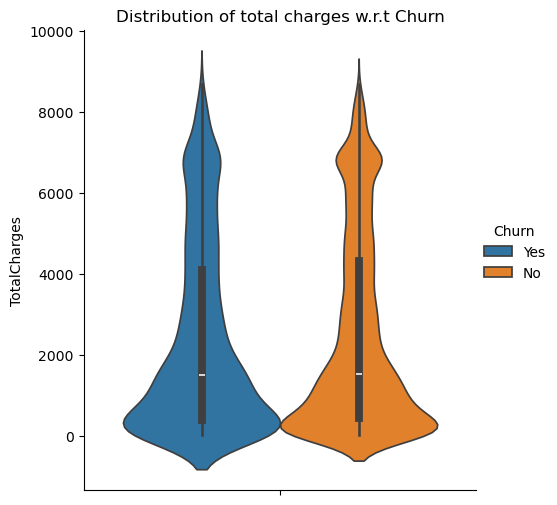

In [824]:
tot_charge_churn_plot = sns.catplot(kind='violin', data=combined_df, hue='Churn', y='TotalCharges')
tot_charge_churn_plot.ax.set_title('Distribution of total charges w.r.t Churn')
plt.show()

In [826]:
combined_df['TotalCharges'].value_counts().iloc[:5]

TotalCharges
20.20      1470
6844.50    1423
1345.75      17
114.70       17
6822.15      17
Name: count, dtype: int64

- TotalCharges have a kind of **bi-modal distribution** with two heavy peaks at values of **20.20 and 6844.50**, this suggests that there are two kind of customers, low paying and high paying ones.

- **<ins>Strange Observation</ins>: MonthlyCharges and TotalCharges have a very different distribution.**

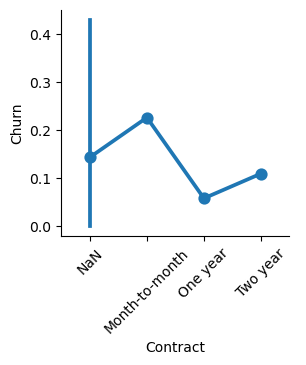

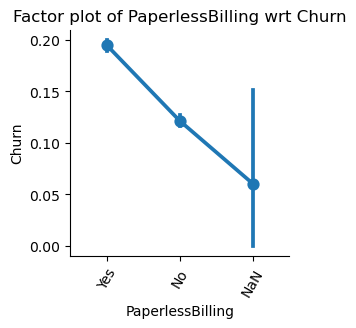

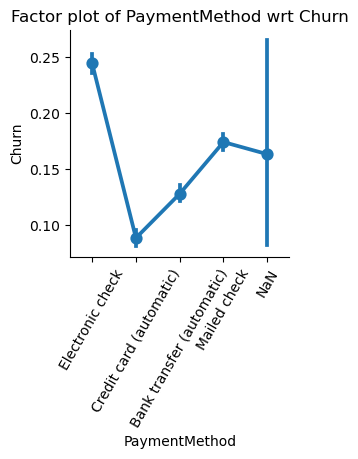

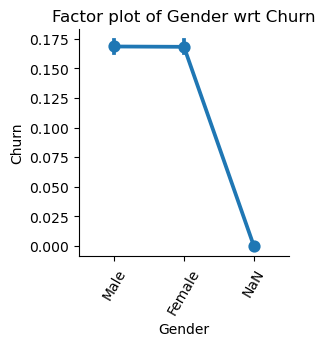

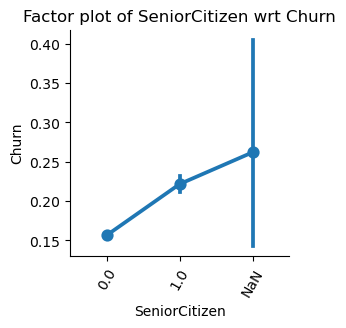

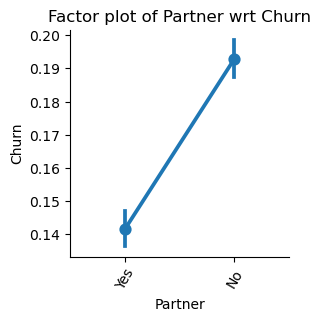

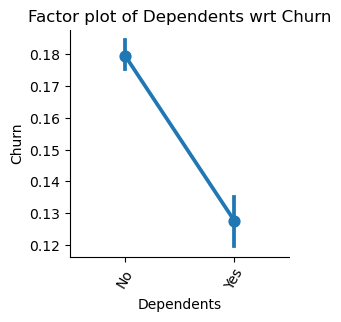

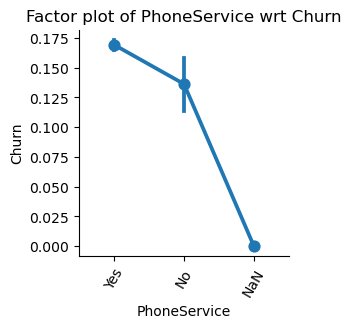

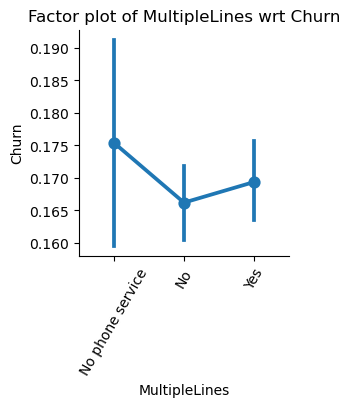

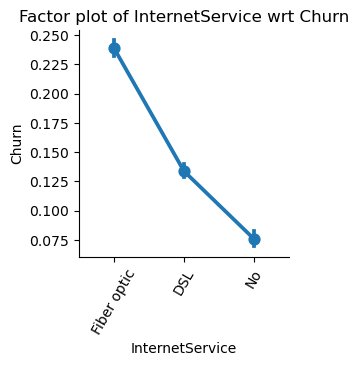

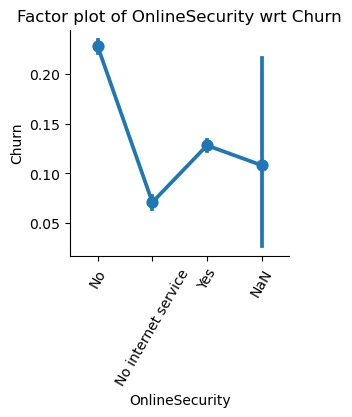

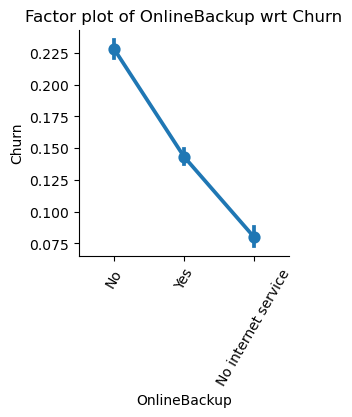

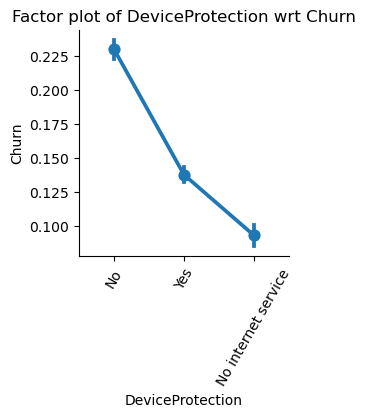

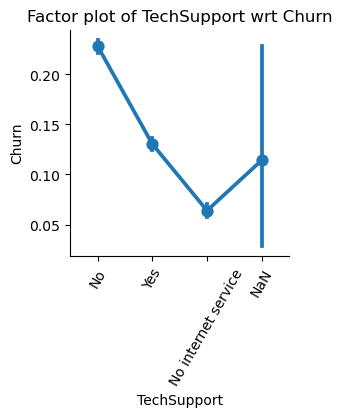

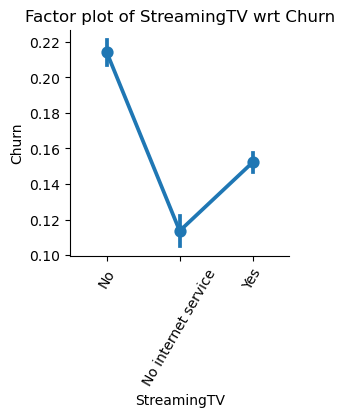

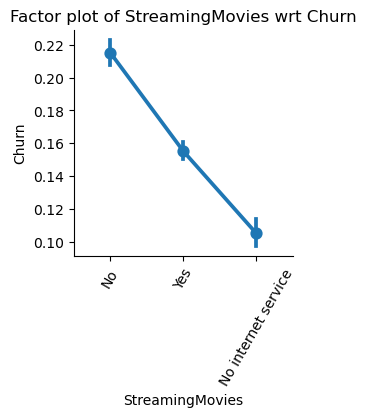

In [829]:
ordinal_features = ['Contract']
ordinal_features_order_dict = {'Contract': ['NaN', 'Month-to-month', 'One year', 'Two year']}

categorical_features = ['PaperlessBilling', 'PaymentMethod', 
                        'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies']



temp_combined_df = combined_df.copy()
temp_combined_df['Churn'] = temp_combined_df['Churn'].replace({'No':0, 'Yes':1})

for feat, feat_order in ordinal_features_order_dict.items():
    temp_combined_df.loc[temp_combined_df[feat].isna(), feat] = 'NaN'

for feat in categorical_features:
    temp_combined_df.loc[temp_combined_df[feat].isna(), feat] = 'NaN'


def plot_ordinal_features(ordinal_features_order_dict):
    nfeatures = len(ordinal_features_order_dict)
    for feat, feat_order in ordinal_features_order_dict.items():
        ordinal_feature_plot = sns.catplot(kind='point', x=feat, 
                                          y='Churn', data=temp_combined_df, 
                                          height=3, order = feat_order)
        ordinal_feature_plot.ax.set_xticklabels(feat_order, rotation=45)
    plt.show()

def plot_categorical_features(categorical_features):
    nfeatures = len(categorical_features)
    for feat in categorical_features:
        feat_order = temp_combined_df[feat].unique().tolist()
        categorical_feature_plot = sns.catplot(kind='point', x=feat, 
                                          y='Churn', data=temp_combined_df, 
                                          height=3, order = feat_order)
        categorical_feature_plot.ax.set_xticklabels(feat_order, rotation=60)
        categorical_feature_plot.ax.set_title(f'Factor plot of {feat} wrt Churn')
    plt.show()


plot_ordinal_features(ordinal_features_order_dict)
plot_categorical_features(categorical_features)

**Contigency Table of all the categorical feature w.r.t Churn category (Normalized w.r.t Churn)**

In [1090]:
def plot_consec_dfs(ord_cat_features):
    dfs = []
    for feature in ord_cat_features:
        df = pd.crosstab(combined_df[feature], combined_df['Churn'], 
                         dropna=False, normalize='columns', margins=True).style.background_gradient(cmap='summer_r')
        dfs.append(df)
    display_side_by_side(*dfs, titles=ord_cat_features)

ord_cat_features = categorical_features + list(ordinal_features_order_dict.keys())

plot_consec_dfs(ord_cat_features)

Churn,No,Yes,All
PaperlessBilling,,,
No,0.380546,0.260059,0.360617
Yes,0.618370,0.739596,0.639383
nan,0.001083,0.000345,0.000000
Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),0.263783,0.190986,0.251892
Credit card (automatic),0.175180,0.083751,0.160022
Electronic check,0.252498,0.403903,0.278373
Mailed check,0.307106,0.319979,0.309714


**Contigency Table of all the categorical feature w.r.t Churn category (Normalized w.r.t Categorical feature)**

In [1084]:
def plot_consec_dfs(ord_cat_features):
    dfs = []
    for feature in ord_cat_features:
        df = pd.crosstab(combined_df[feature], combined_df['Churn'], dropna=False, normalize='index').style.background_gradient(cmap='summer_r')
        dfs.append(df)
    display_side_by_side(*dfs, titles=ord_cat_features)

ord_cat_features = categorical_features + list(ordinal_features_order_dict.keys())

plot_consec_dfs(ord_cat_features)

Churn,No,Yes
PaperlessBilling,,
No,0.878529,0.121471
Yes,0.805159,0.194841
nan,0.939394,0.060606
Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.872227,0.127773
Credit card (automatic),0.911802,0.088198
Electronic check,0.755488,0.244512
Mailed check,0.825895,0.174105


## **Insights:**
<h3><ins>1) Contract</ins></h3> <b>Month-to-Month</b> contract users have greater churn rate (<b>0.225</b>).<br>53% of customers have month-to-month contracts.
<h3><ins>2) PaperlessBilling</ins></h3> Customers with paper less billing have a greater chance of getting churned.<br>62% of customers have paperless billing.
<h3><ins>3) PaymentMethod</ins></h3> Customers with Credit card (automatic) are least likely at getting churned.<br> It has even distribution across various categories.
<h3><ins>4) Gender</ins></h3> Male and females both have equal ratio in the dataset.
<h3><ins>5) SeniorCitizen</ins></h3> Only 18% of customers are senior citizens.<br>SeniorCitizens are more likely at getting churned. <b>Deathhhhhh</b>
<h3><ins>6) Partner</ins></h3> Single customers are more likely to get churned.<br> Dataset is balanced for this feature.
<h3><ins>7) Dependents</ins></h3> Only 22% of customers have dependents.<br> Customers with no dependents are more likely to get churned.<br> 78% of customers have no dependents.
<h3><ins>8) PhoneServies</ins></h3> 97% of customers have phone servies.
<h3><ins>9) InternetServices</ins></h3> Proportion of customers enrolled with DSL and Fiber optics is approximately same.<br> The better the internet service plan the greater are the chances for those customers to get churned.
<h3><ins>10) OnlineSecurity</ins></h3> 50% of customers have no online security service.<br> Customers with no Online Security are more likely to get churned (23%) than those who have a plan.(13%)
<h3><ins>11) OnlineBackup</ins></h3> There are nearly equal no. of people who have and don't have online security.<br> Customers are more likely to get churned if they don't have Online Backup service <b>(23% compared to 14%)</b>.
<h3><ins>12) DeviceProtection</ins></h3> Very similar situation as OnlineBackup.
<h3><ins>13) TechSupport</ins></h3> Again a similar situation but the customers who subsribed for this service are only <b>(35%)</b>
<h3><ins>14) Streaming Service</ins></h3> Nearly 50% of customers have subscribed for these services and again customers who didn't subscribe are more likely to get churned. <b>(21% compared with 15%)</b>













## MultiVariate Analysis

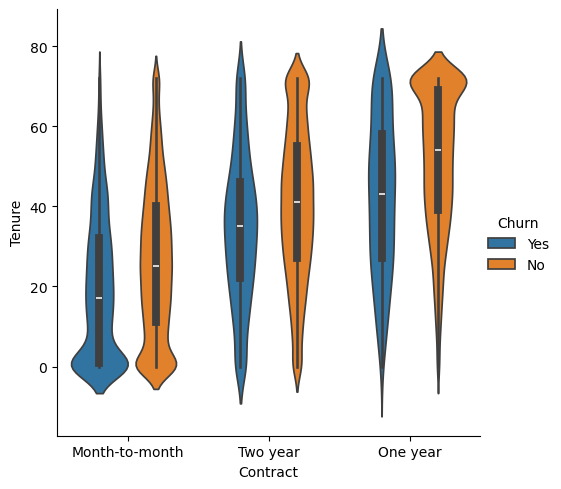

In [835]:
sns.catplot(kind='violin', x='Contract', y='Tenure', data=combined_df, hue='Churn')

- Customers with Month-to-month contract have lower tenure.
- Customers with One year contract have the greatest tenure.

In [840]:
np.round(pd.crosstab(combined_df['Contract'], combined_df['PaperlessBilling'], 
            values=combined_df['Churn'].replace({'Yes':1, 'No':0}), aggfunc='mean')*100, 2).style.background_gradient(cmap='summer_r')

PaperlessBilling,No,Yes
Contract,,
Month-to-month,16.990000,25.250000
One year,4.620000,6.650000
Two year,8.310000,12.540000


### Analysis of Two Continous Variables with Churn variable

In [843]:
def plot_2d_bin_churn_percentage(x_feature, y_feature, nx_bins, ny_bins, n_trials=500):
    x_edges_avg = []
    y_edges_avg = []
    percentage_occurence_avg = []
    for _ in range(n_trials):
        n_churned = len(combined_df.loc[combined_df['Churn']=='Yes'])
        no_churn_sample_df = combined_df.loc[combined_df['Churn']=='No'].sample(n_churned)
        churn_sample_df = combined_df.loc[combined_df['Churn']=='Yes'].sample(n_churned)
        sample_combined_df = pd.concat([no_churn_sample_df, churn_sample_df], axis=0)
        sample_combined_df['Churn'] = sample_combined_df['Churn'].replace({'Yes':1, 'No':0})
    
    
        sample_combined_df = sample_combined_df.dropna(subset=[x_feature, y_feature])
    
        hist, x_edges, y_edges = np.histogram2d(sample_combined_df[x_feature], sample_combined_df[y_feature],
                                           bins=[nx_bins, ny_bins])
    
        binary_hist, _, _ = np.histogram2d(sample_combined_df[x_feature], sample_combined_df[y_feature],
                                      bins=[x_edges, y_edges], weights=sample_combined_df['Churn'])
        percentage_occurrence = (binary_hist / (hist+0.00001)) * 100
    
        if len(x_edges_avg)==0:
            x_edges_avg.extend(x_edges)
        else:
            x_edges_avg = np.array(x_edges_avg) + x_edges
        if len(y_edges_avg)==0:
            y_edges_avg.extend(y_edges)
        else:
            y_edges_avg = np.array(y_edges_avg) + y_edges
        if len(percentage_occurence_avg)==0:
            percentage_occurence_avg.extend(percentage_occurrence)
        else:
            percentage_occurence_avg = np.array(percentage_occurence_avg) + percentage_occurrence
    
    x_edges_avg /= n_trials
    y_edges_avg /= n_trials
    percentage_occurence_avg /= n_trials
    
    plt.figure(figsize=(8, 6))
    plt.imshow(percentage_occurence_avg.T, origin='lower', extent=[x_edges_avg[0], x_edges_avg[-1], y_edges_avg[0], y_edges_avg[-1]], aspect='auto', cmap='coolwarm')
    plt.colorbar(label='% occurrence of Churn variable')
    plt.xlabel(f'{x_feature}')
    plt.ylabel(f'{y_feature}')
    plt.title('Percentage of Churned customers in 2D bins (Red->Churned Customers, Blue->Loyal Customers)')
    plt.show()



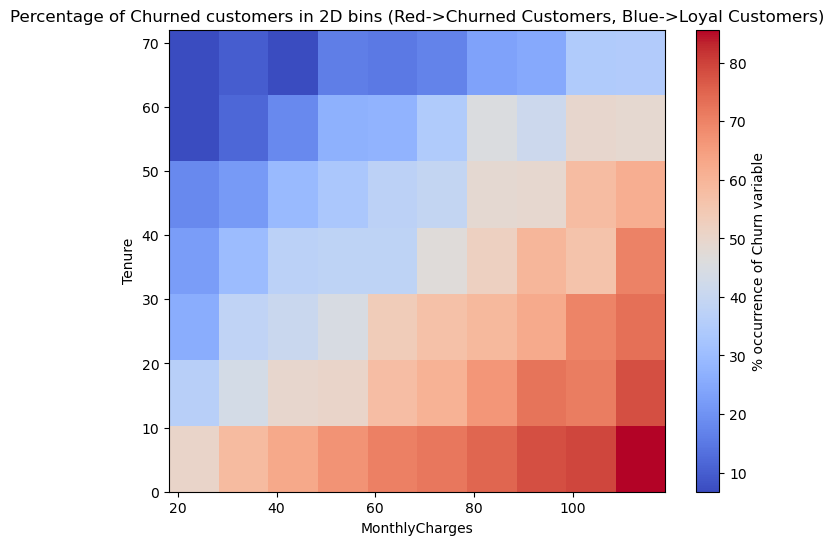

In [845]:
x_feature = 'MonthlyCharges'
y_feature = 'Tenure'

ny_bins=7
nx_bins=10

plot_2d_bin_churn_percentage(x_feature, y_feature, nx_bins, ny_bins)

We can observe a very clear distinction between customers who got churned and those who didn't.<br>
**Customers with lower Tenure and greater MonthlyCharges are more likely to get churned.**<br>

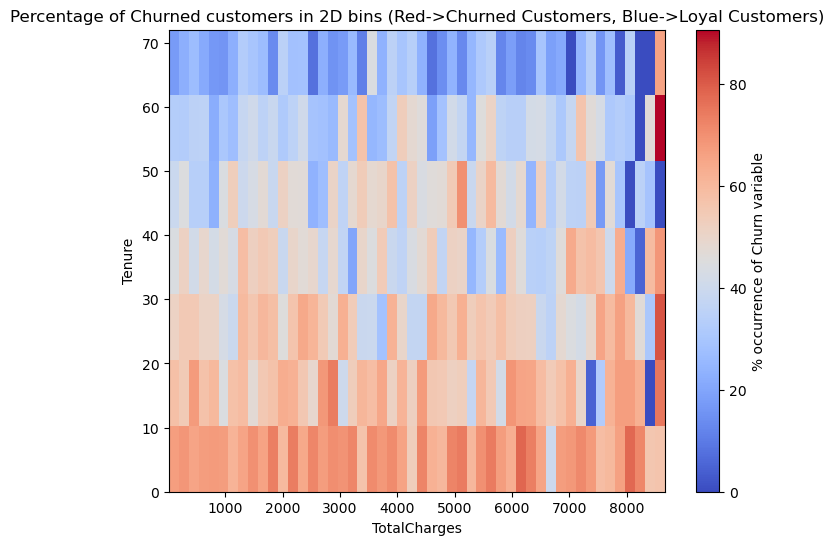

In [847]:
x_feature = 'TotalCharges'
y_feature = 'Tenure'

ny_bins=7
nx_bins=50

plot_2d_bin_churn_percentage(x_feature, y_feature, nx_bins, ny_bins)

**Total Charges is not a strong differentiator for churn analysis of customers.**<br>

### Analysis of effects of Services used by customers on their churn rate

In [851]:
for col in cust_serv_df.columns:
    if col != 'customerID':
        print(f'{col}: {combined_df[col].unique().tolist()}')

PhoneService: ['Yes', 'No', nan]
MultipleLines: ['No phone service', 'No', 'Yes']
InternetService: ['Fiber optic', 'DSL', 'No']
OnlineSecurity: ['No', 'No internet service', 'Yes', nan]
OnlineBackup: ['No', 'Yes', 'No internet service']
DeviceProtection: ['No', 'Yes', 'No internet service']
TechSupport: ['No', 'Yes', 'No internet service', nan]
StreamingTV: ['No', 'No internet service', 'Yes']
StreamingMovies: ['No', 'Yes', 'No internet service']


**No. of customers enrolled with each service**

In [853]:
cust_serv_df.drop('customerID', axis=1).apply(
    lambda service: len(np.where(service=='Yes')[0]) if service.name!='InternetService' else len(np.where(service!='No')[0]) , 
    axis=0).sort_values(ascending=False)

PhoneService        33520
InternetService     29187
StreamingMovies     17138
StreamingTV         16832
MultipleLines       15931
OnlineBackup        15080
DeviceProtection    15037
TechSupport         12341
OnlineSecurity      12216
dtype: int64

**Looking at customers who applied for no service at all**

In [863]:
no_service_condition = pd.Series(np.ones(combined_df.shape[0])==1)
for col in cust_serv_df.columns:
    if col != 'customerID':
        no_service_condition = (no_service_condition)&(cust_serv_df[col]=='No')

In [865]:
combined_df.loc[no_service_condition]

,customerID,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
10090,10091,2.0,Month-to-month,No,Mailed check,18.25,5438.9,No,Female,0.0,No,No,No,No,No,No,No,No,No,No,No


Only 1 customer exists who enrolled for None of the services and She's still loyal to the company.

In [959]:
# services_cols = cust_serv_df.drop('customerID', axis=1).columns.tolist()
# N_services = len(services_cols)
# churn_threshold = 50

# def calc_churns(services_dict, i, serv_i):
#     cust_selection_condition = (combined_df['Churn']=='Yes')
#     for service_name, service_choice in services_dict.items():
#         if str(service_choice)!='nan':
#             cust_selection_condition = (cust_selection_condition) & (combined_df[service_name]==service_choice)
#         else:
#             cust_selection_condition = (cust_selection_condition) & (combined_df[service_name].isna())
#     ncust_churned = combined_df[cust_selection_condition].shape[0]
#     return ncust_churned


# combination_churn_list = []
# def calculate_churned_custs(services_dict, i, serv_i):
#     if i == N_services:
#         if len(services_dict)==0:
#             return services_dict, 'NaN'
#         ncust_churned = calc_churns(services_dict, i, serv_i)
#         combination_churn_list.append((services_dict, ncust_churned))
#         return
#     service_name = services_cols[i]
#     service_choice_list = combined_df[service_name].unique().tolist()
#     service_choice_list = list(filter(lambda x: str(x)!='nan', service_choice_list))
#     service_choice = service_choice_list[serv_i]

#     temp_services_dict = copy.deepcopy(services_dict)
#     temp_services_dict[service_name] = service_choice
#     ncust_churned = calc_churns(services_dict, i, serv_i)
#     if ncust_churned < churn_threshold:
#         return
#     if serv_i < len(service_choice_list)-1:
#         calculate_churned_custs(temp_services_dict, i, serv_i+1)
#     else:
#         calculate_churned_custs(temp_services_dict, i+1, 0)

#     if serv_i < len(service_choice_list)-1:
#         calculate_churned_custs(services_dict, i, serv_i+1)
#     else:
#         calculate_churned_custs(services_dict, i+1, 0)

# calculate_churned_custs(dict(), 0, 0)

In [957]:
# sorted(combination_churn_list, key=lambda x: x[1], reverse=True)

**Analysing Churn rates w.r.t both the streaming services**

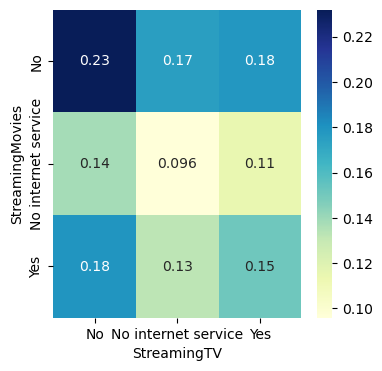

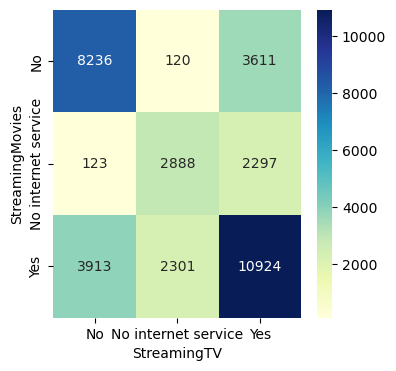

In [1076]:
streaming_ct = pd.crosstab(combined_df['StreamingMovies'], 
            combined_df['StreamingTV'], 
            values=combined_df['Churn'], 
            aggfunc=lambda x: np.where(x=='Yes')[0].shape[0]/x.shape[0])

streaming_ct_count = pd.crosstab(combined_df['StreamingMovies'], 
            combined_df['StreamingTV'])


plt.figure(figsize=(4, 4))
sns.heatmap(streaming_ct, annot=True, cmap='YlGnBu')
plt.show()
plt.figure(figsize=(4, 4))
sns.heatmap(streaming_ct_count, annot=True, cmap='YlGnBu', fmt='.6g')
plt.show()

- Customers who didn't join any streaming service have the greatest churn rate (about 23%) as compared to customers who joined both (15 %)
- Customers who subscribed for either of the services have (18 %) churn rate.
- So, customers are more loyal if they subscribe for more streaming services.

**Analysing churn rates w.r.t security related services**

In [994]:
# services_contigency_table = pd.crosstab([combined_df['InternetService'], combined_df['OnlineSecurity'], combined_df['TechSupport'], combined_df['MultipleLines'], combined_df['StreamingMovies']], 
#             [combined_df['PhoneService'], combined_df['OnlineBackup'], combined_df['DeviceProtection'], combined_df['StreamingTV']], 
#             values=combined_df['Churn'], 
#             aggfunc=lambda x: np.where(x=='Yes')[0].shape[0]/x.shape[0])

# services_contigency_table_count = pd.crosstab([combined_df['InternetService'], combined_df['OnlineSecurity'], combined_df['TechSupport'], combined_df['MultipleLines'], combined_df['StreamingMovies']], 
#             [combined_df['PhoneService'], combined_df['OnlineBackup'], combined_df['DeviceProtection'], combined_df['StreamingTV']], 
#                                              )/combined_df.shape[0]

In [1132]:
def remove_no_internet_service(df):
    df = df.loc[~df.index.to_frame().isin(['No internet service']).any(axis=1)]
    df = df.loc[:, ~df.columns.to_frame().isin(['No internet service']).any(axis=1)]
    return df

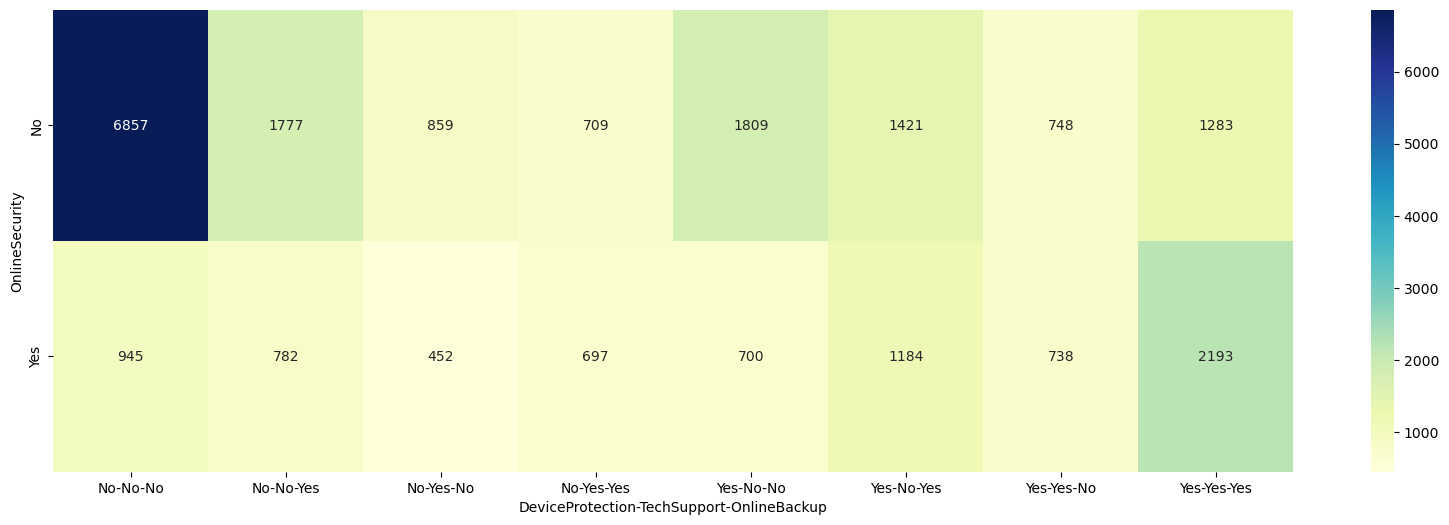

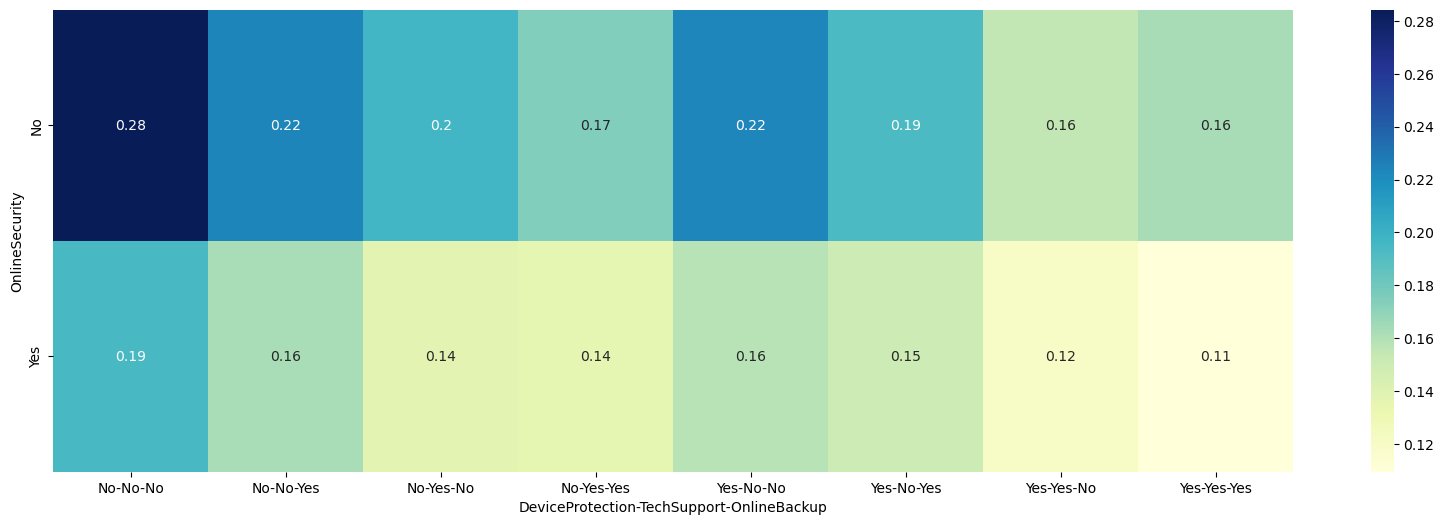

In [1134]:
security_ct = pd.crosstab([combined_df['OnlineSecurity'], combined_df['OnlineBackup']], 
            [combined_df['DeviceProtection'], combined_df['TechSupport']], 
            values=combined_df['Churn'], 
            aggfunc=lambda x: np.where(x=='Yes')[0].shape[0]/x.shape[0])
security_ct_count = pd.crosstab([combined_df['OnlineSecurity'], combined_df['OnlineBackup']], 
            [combined_df['DeviceProtection'], combined_df['TechSupport']])
security_ct_count_data = remove_no_internet_service(security_ct_count.unstack())
plt.figure(figsize=(20, 6))
sns.heatmap(security_ct_count_data, annot=True, cmap='YlGnBu', fmt='.5g')
plt.show()
security_ct_data = remove_no_internet_service(security_ct.unstack())
plt.figure(figsize=(20, 6))
sns.heatmap(security_ct_data, annot=True, cmap='YlGnBu')
plt.show()

### MultiVariate Demographic Analysis

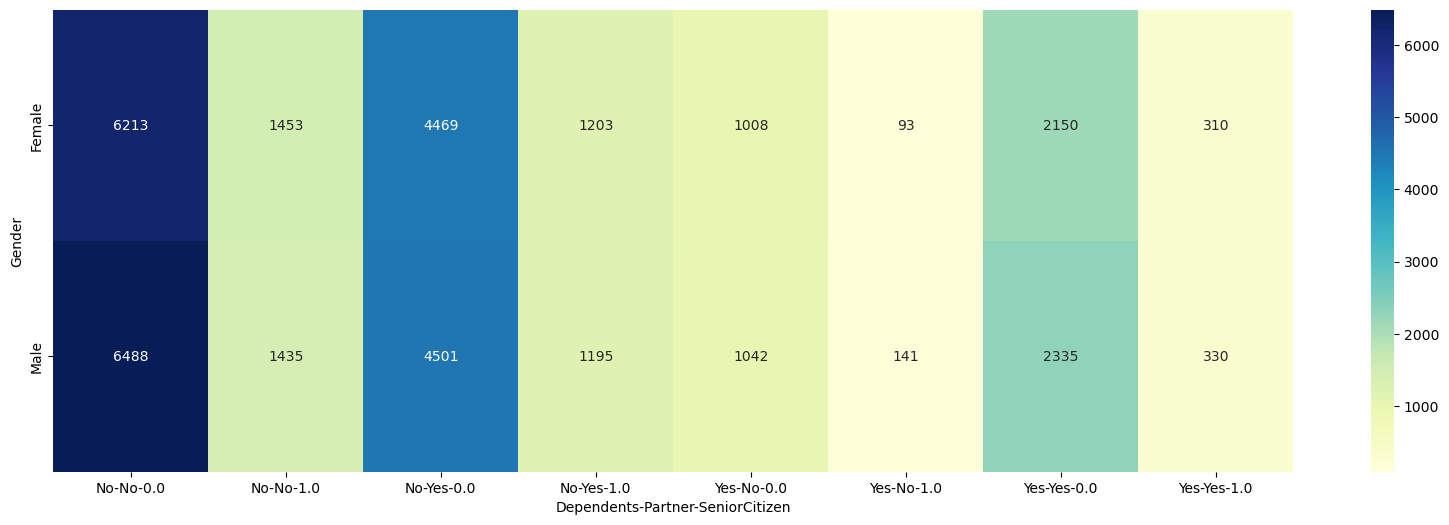

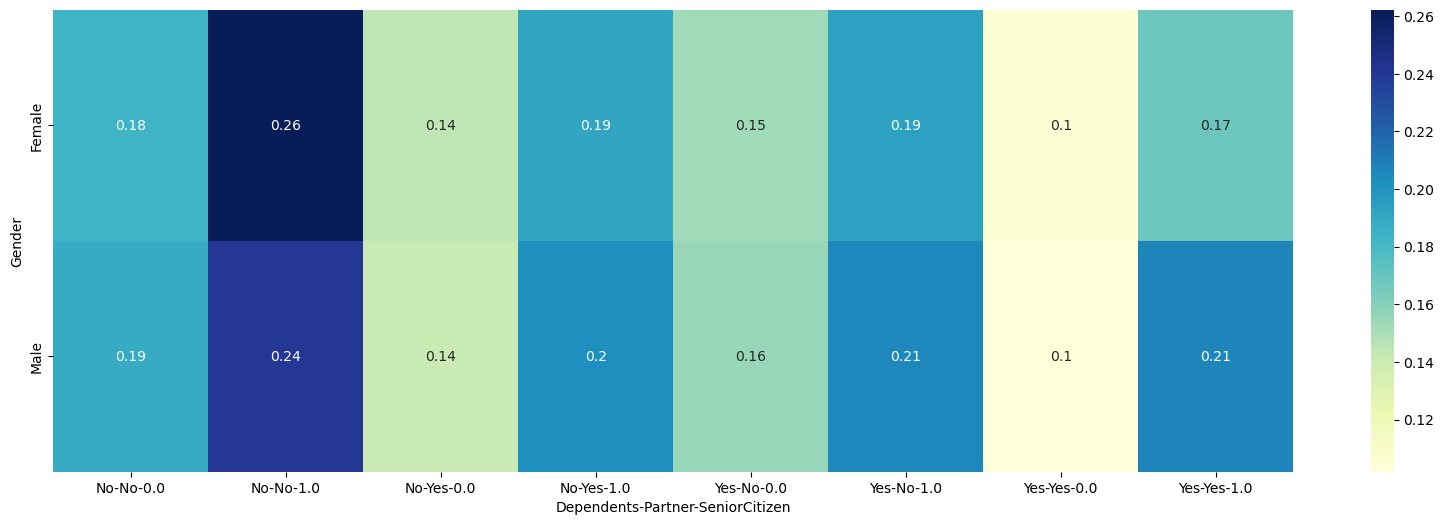

In [1150]:
demo_ct = pd.crosstab([combined_df['Gender'], combined_df['SeniorCitizen']], 
            [combined_df['Dependents'], combined_df['Partner']], 
            values=combined_df['Churn'], 
            aggfunc=lambda x: np.where(x=='Yes')[0].shape[0]/x.shape[0])
demo_ct_count = pd.crosstab([combined_df['Gender'], combined_df['SeniorCitizen']], 
            [combined_df['Dependents'], combined_df['Partner']])
demo_ct_count_data = demo_ct_count.unstack()
plt.figure(figsize=(20, 6))
sns.heatmap(demo_ct_count_data, annot=True, cmap='YlGnBu', fmt='.5g')
plt.show()
demo_ct_data = demo_ct.unstack()
plt.figure(figsize=(20, 6))
sns.heatmap(demo_ct_data, annot=True, cmap='YlGnBu')
plt.show()

## Writing dataframe

In [571]:
output_folder_path = os.path.abspath("Output_telecomData")
output_folder_path

'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\Output_telecomData'

In [573]:
def change_file_extension_to_csv(file_path):
    no_ext_file_path, extension_name = file_path.split('.')
    if extension_name!='csv':
        return no_ext_file_path+'.csv'
    return file_path

In [575]:
inner_output_folder_name = "WithNaNs"
inner_output_folder_path = os.path.join(output_folder_path, inner_output_folder_name)

if not os.path.exists(inner_output_folder_path):
    os.makedirs(inner_output_folder_path)

output_file_paths = [change_file_extension_to_csv(os.path.join(inner_output_folder_path, output_filename)) for output_filename in datafile_names]
print(output_file_paths)

['C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\Output_telecomData\\WithNaNs\\Customer_account_info.csv', 'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\Output_telecomData\\WithNaNs\\Customer_Churn.csv', 'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\Output_telecomData\\WithNaNs\\Customer_demographics.csv', 'C:\\Users\\shreyanlnu\\dev\\Deloitte_capstone_project\\Output_telecomData\\WithNaNs\\Customer_services.csv']


In [587]:
cust_acc_df.to_csv(output_file_paths[0], na_rep='NaN', index=False)
cust_churn_df.to_csv(output_file_paths[1], na_rep='NaN', index=False)
cust_demo_df.to_csv(output_file_paths[2], na_rep='NaN', index=False)
cust_serv_df.to_csv(output_file_paths[3], na_rep='NaN', index=False)